<h1><center><b>Machine Learning</></center></h1>
<h4><center>89-511</center></h4>
<h3><center>Exercise 1 - Practical Part</center></h3>

Your Name:  
<font color='red'>
Osher Elhadad, 318969748   
</font>


____________

In this exercise we will learn to:
1. Load and prepare datasets.
2. Implement KNN algorithm.

**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure all the cells run without errors.
- When you finish the assignment, download the notebook and submit it and your pdf file to the **"submit"** system. 
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  



If you have questions, please ask at the forum on moodle.

Personal requests please send to TA emails.

### **1. Introduction to Colab and Numpy**

We use the Python programming language for all assignments in this course with the help of popular packages (like numpy, matplotlib, sklearn, scipy and pytorch).

Go over this **[numpy tutorial](https://numpy.org/doc/stable/user/quickstart.html)** or this **[tutorial](https://cs231n.github.io/python-numpy-tutorial/)** before starting this assignment and **[this notebook](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb)** to understand how to work with basic packages and with Google Colab. It is important to go over them before starting this assignment.

In [207]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline

Play with NumPy here:

In [208]:
x = np.array([1,2,3])
y = np.array([4,5,6])
x, y

(array([1, 2, 3]), array([4, 5, 6]))

Pay attention: with NumPy, you can sum vectors in one line, you don't have to iterate over the elements.

In [209]:
x + y
# x - y
# x * y
# x**2
# (x - y)**2

array([5, 7, 9])

In [210]:
print(np.sum(x))
# np.mean(x)
np.sqrt(x)

6


array([1.        , 1.41421356, 1.73205081])

### **2. Data**

##Data
We'll use CIFAR10 dataset.
It is a very familiar dataset. Please read a little bit [here](https://www.cs.toronto.edu/~kriz/cifar.html).

To import the dataset, we'll use the torch library. Don't dig about this library now, we will learn about it better in the next weeks.

In [211]:
import torch
from torchvision import datasets,transforms
import torchvision

In [212]:
######################################################
##   Don't change this cell. Use it as a black box  ##
######################################################

transform = transforms.Compose(
    [transforms.ToTensor(),
     ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=1)

# CIFAR10 labels:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let's see a few images with their labels

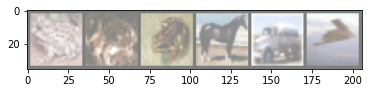

 frog  frog  frog horse truck plane


In [213]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

testiter = iter(testloader)
test_images, test_labels = testiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:6]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(6)))

Each image is represented as a RGB image.
each pixel has a number between 0 and 1 on each dimension.

In [214]:
images[0], images[0].size()

(tensor([[[0.5176, 0.6039, 0.6118,  ..., 0.4549, 0.5020, 0.4902],
          [0.4431, 0.5176, 0.5882,  ..., 0.4000, 0.4784, 0.4510],
          [0.4353, 0.5059, 0.5843,  ..., 0.4039, 0.4824, 0.4627],
          ...,
          [0.8039, 0.7882, 0.7843,  ..., 0.8196, 0.8157, 0.7922],
          [0.7843, 0.7529, 0.7882,  ..., 0.8039, 0.7961, 0.7882],
          [0.7647, 0.7490, 0.7804,  ..., 0.7922, 0.7843, 0.7882]],
 
         [[0.4471, 0.5373, 0.5490,  ..., 0.4353, 0.5059, 0.4745],
          [0.3725, 0.4549, 0.5255,  ..., 0.3569, 0.4745, 0.4392],
          [0.3647, 0.4392, 0.5216,  ..., 0.3647, 0.4824, 0.4549],
          ...,
          [0.6549, 0.6314, 0.6196,  ..., 0.6745, 0.6667, 0.6471],
          [0.6314, 0.5922, 0.6196,  ..., 0.6549, 0.6471, 0.6353],
          [0.6039, 0.5922, 0.6196,  ..., 0.6431, 0.6314, 0.6314]],
 
         [[0.4235, 0.5020, 0.4980,  ..., 0.4039, 0.4784, 0.4588],
          [0.3608, 0.4196, 0.4706,  ..., 0.3373, 0.4510, 0.4235],
          [0.3569, 0.4118, 0.4745,  ...,

CIFAR is a big datadset, let's use only 100 images and convert them to numpy arrays

#### Train Set

In [215]:
x_train = np.array(images)
y_train = np.array(labels)

In [216]:
x_train.shape, y_train.shape

((100, 3, 32, 32), (100,))

#### Test Set

In [217]:
x_test = np.array(test_images)
y_test = np.array(test_labels)
x_test.shape, y_test.shape

((10, 3, 32, 32), (10,))

### **3. KNN**

First of all, let's implement euclidean distance function, so we will be able to calculate closeness between images.

**A reminder**: the euclidean distance formula is:

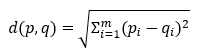

**Pay attention**: point representation might contains more than two numbers (means m>2).

In [218]:
def euclidean_distance(p1, p2):
  return np.sqrt(np.sum((np.array(p1)-np.array(p2))**2))

Now, let's implement KNeighborsClassifier class.

In 'fit' function you have to get the inputs, and prepare the classifier for prediction (think what exactly you have to prepare)

In 'predict' fucntion you have to get a test set and return a numpy array contains the classes (that the model predicted) of each element from the test set.

We added a few more function declarations that might help you. Fill free to implement them (or not) and to add some more functions.

In adition, we've presented a few KNN implementations in class. You are allowed to implement your own algorithm.


In [219]:
from collections import Counter

class KNeighborsClassifier:
  def __init__(self, distance_metric=euclidean_distance, n_neighbors=None):
    self.k = n_neighbors
    self.distance_func = distance_metric

  def fit(self, x, y):
    self.images_arr = x
    self.images_classes = y

  def predict(self, x_test):
    predicted = []
    for test_img in x_test:
      distance_arr = self.distance(test_img)
      nearest_neighbor_class = self.nearest_neighbor(distance_arr)
      predicted.append(nearest_neighbor_class)
    return np.array(predicted)
  
  def distance(self, test_img):
    distance_arr = []
    for train_img in self.images_arr:
      distance_arr.append(self.distance_func(test_img, train_img))
    return np.array(distance_arr)

  def nearest_neighbor(self, distance_array):
    k_nearest_indexes = np.argsort(distance_array)[:self.k]
    k_nearest_classes = self.images_classes[k_nearest_indexes]
    return Counter(k_nearest_classes).most_common(1)[0][0]



In [220]:
def error_rate(y_predict, y_true):
  """
  y_predict: the model's output
  y_true: the expected output
  """
  return np.mean(y_predict != y_true)
  

**Using KNN**

Use the KNeighborsClassifier class you've implemented with n_neighbors=1. Fit this KNN model to the training data.

In [221]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

**Predictions and Evaluations**

Use the predict method to predict values using your KNN model and x_test. In addition, create a [confusion matrix](https://www.sciencedirect.com/topics/engineering/confusion-matrix) and a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Make sure you don't get any errors in this cell.

In [222]:
pred = knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred,zero_division=0))

[[0 0 0 0 0 1]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 2 0 1 0]
 [0 0 0 0 0 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           6       0.50      0.33      0.40         3
           8       0.50      1.00      0.67         2

    accuracy                           0.30        10
   macro avg       0.17      0.22      0.18        10
weighted avg       0.25      0.30      0.25        10



**Choosing a K Value**

Implement a for loop in 'find_best_k' function (hint: use KNeighborsClassifier object) that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.
The function will return the best k, and the error rate of each k as a numpy array.

In [223]:
MIN_K = 1
MAX_K = 15

def find_best_k(min_k=1, max_k=15):
  k_arr = []
  error_rate_arr = []
  for k in range(min_k, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    k_arr.append(k)
    error_rate_arr.append(error_rate(pred, y_test))
  error_rate_np = np.array(error_rate_arr)
  min_val_index = np.argmin(error_rate_arr)
  return k_arr[min_val_index], error_rate_np



In [224]:
best_k, error_rate_arr = find_best_k(min_k=MIN_K, max_k=MAX_K)

Now create the following plot using the information from your for loop.

Text(0, 0.5, 'Error rate')

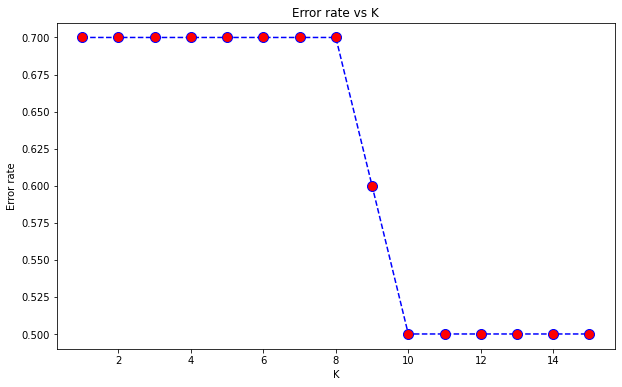

In [225]:
plt.figure(figsize=(10,6))
plt.plot(range(MIN_K,MAX_K+1),error_rate_arr,color='blue',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

**Retrain with new K Value**

Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [226]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [227]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred,zero_division=0))

[[0 0 0 0 0 1]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           6       0.75      1.00      0.86         3
           8       0.50      1.00      0.67         2

    accuracy                           0.50        10
   macro avg       0.21      0.33      0.25        10
weighted avg       0.33      0.50      0.39        10



**:)**